# Convolutional Neural Networks 

#### Convolution
- Use Kernel (small matrix of weights) to slide over the 2D image
- Perform element wise multiplication with the overlapping part
- Sum up the results into a single output pixel

<img src="https://miro.medium.com/max/1400/1*Fw-ehcNBR9byHtho-Rxbtw.gif" alt="Drawing" style="width: 400px;"/>

### Stride
- Spacing between position of kernel
- See stride = 2 below in the animation

<img src="https://miro.medium.com/max/588/1*BMngs93_rm2_BpJFH2mS0Q.gif" alt="Drawing" style="width: 300px;"/>

We convolve the filter with our image by sliding the 3x3 filter image over the 6x6 image and in each position we multiply the overlapping "pixels", sum them up and take the sum as a value of the resulting image in that position. We then move the filter one cell to the right and repeat the process. When we're done with the first row, we move to the second row, etc... Let's calculate a couple of values together and then you'll do the rest on your own.

![](images/Convolution.gif)

 Now continue on your own until you have covered your whole original image with your filter.

you can check the result in `images/convolved.jpeg`

**Q**: What is the size of the resulting image, if the size of the original image is `n x n` and the size of the filter is `f x f`?

**A**: `n-f+1`

You just ran your first edge-detection algorithm! 

That is basically how convolutional neural networks work in very simple terms. Except, we don't specify the filters for them to use, filters are the parameters (weights) that they learn (your `w`s).

### Padding
- Add extra pixels to edges to account for patterns in edge pixels
- We've seen that the resulting image is smaller than the original image. Pixels on the edges get visited by the filter fewer times than the pixels in the middle which isn't always desireable. To get around that, we sometimes use padding, which does exactly what the name suggest, pads the original image so that the resulting image is larger.

<img src="https://miro.medium.com/max/790/1*1okwhewf5KCtIPaFib4XaA.gif" alt="Drawing" style="width: 300px;"/>

How much padding to use?

Two common options:

* `Valid`: no padding
* `Same`: preserves image size

**Q**: What is the size of the resulting image, if the size of the original image is `n x n`, the size of the filter is `f x f`, and we use `p` pixels of padding on each side?

**A**: `n-f+1+2p`

**Q**: What is the of the resulting image, if the size of the original image is `n x n`, the size of the filter is `f x f`, we use padding of `p` and stride of `f`?

**A**: `(n-f+2p)/s + 1`

#### Pooling

In addition to convolutional layers that we saw above, in CNN we also have _pooling layers_. Pooling accumulates/pools together the features created in convolutional layers.

Max pooling, the most common pooling method, selects only the highest value in a given pooling window.

![max_pooling.png](images/max_pooling.png)

Other type of Pooling - Average pooling

#### Color (RGB) image

In the case of a color (RGB) image we start with three filters corresponding to each color channel, perform convolution like before, and then sum up three channels to form the resulting image that is now 4x4x1.

#### One layer of CNN

![rgb.png](images/rgb.png)

In CNNs we generally use more than one filter in each layer, so the third dimension of the resulting image will be equal to the number of filters used.

![rgb_2.png](images/rgb_2.png)

In diagrams of CNNS, this is usually represented in this way:

![one_layer.png](images/one_layer.png)

## Refresher on what are image kernels

Spend some time looking at this explanation of [image Kernels](https://setosa.io/ev/image-kernels/) (feel free to play around with all the settings!) and discuss the following questions:
- What does the number at each pixel location in a greyscale image mean?
- What is a kernel?
- How is a kernel applied to an image?
- How does changing the numbers in the kernel affect the output image?
- What features of an image can we highlight using a kernel?

#### Example CNN

The typical architecture of CNNs has a couple of convolutional layers, followed by _fully connected_ layer, i.e. feed forward NN.

In some of the most famous CNN architectures it is common to alternate convolutional and pooling layers, like this. Shown below is one of the classical CNN architecture, LeNet-5.

![cnn_with_pooling.png](images/cnn_with_pooling.png)

The use of filters:
* lowers the number of parameters
* makes sense because a filter used for detecting a particular feature could be useful in multiple areas of an image

Pixels close by are related:
* flattening the image would lose some of this information
* pixels far away aren't: we don't need to connect each of the pixels of the input with the each of the pixels of the output

### Visualisation of CNN
https://adamharley.com/nn_vis/cnn/2d.html

### Other layers to reduce overfitting
- Batchnormalization
    - Batch normalization is a method used to make artificial neural networks faster and more stable 
    through normalization of the layers' inputs by re-centering and re-scaling.
- Dropout
    - Dropout is a regularization technique for reducing overfitting in artificial neural networks by preventing complex co-adaptations on training data. It is an efficient way of performing model averaging with neural networks.

# CNN with Keras

In [1]:
# importing the required modules
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, Dense, MaxPooling2D, Activation, Flatten

from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical
import numpy as np

### 0. Load Data Set

In [2]:
# splitting mnist data present within keras dataset into train and test
(xtrain, ytrain), (xtest, ytest) = mnist.load_data() 

11490434/11490434 [==============================] - 1s 0us/step


check the shapes

In [3]:
xtrain.shape,xtest.shape,ytrain.shape,ytest.shape

((60000, 28, 28), (10000, 28, 28), (60000,), (10000,))

In [4]:
xtrain

array([[[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       ...,

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 

#### Reshape to mirror a set of: (images, w,h,channels)
(For using a 2D convolution we need the input shape to have 3 dimensions which are width,height,number_of_color_channels)
Note: Color images have 3 color channels (RGB) , black and white image has 1 color channel

In [5]:
xtrain.reshape(60000,28,28,1).shape

(60000, 28, 28, 1)

In [6]:
xtrain = xtrain.reshape(60000,28,28,1)
xtest =xtest.reshape(10000,28,28,1)

In [7]:
# From the mnist dataset we have 10 classes to categorize, ie numbers from 0-9
np.unique(ytrain) 

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8)

#### One hot encode the labels

In [8]:
# creates a copy of ytest, for more details (https://docs.python.org/3/library/copy.html)
# we do this because we want to keep the original labels and another variable with the labels encoded
ytest_true = ytest.copy() 

In [9]:
to_categorical(ytest) # eg. of how to one-hot-encode categorical variables

array([[0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [10]:
ytrain = to_categorical(ytrain)
ytest = to_categorical(ytest)

In [11]:
ytest

array([[0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

## 1. Lets define the model and try to create it in tensorflow
- Convolutional layer with 6 filters 
    - Maxpooling
    - ReLu Activation
- Convolutional layer with 16 filters 
    - Maxpooling
    - ReLu Activation
- Flatten()
- Dense layer with 10 neurons
- Softmax activation for the classes

Add all layers within the Sequential block while constructing CNN model

In [12]:
# creating the tensorflow model with the above definition
from tensorflow.keras import backend as K
K.clear_session() # clear the cache of model parameters
model = Sequential([
    Conv2D(filters=6,kernel_size=(3,3),strides=(1,1),padding='same',activation='relu',input_shape=(28,28,1)),
    MaxPooling2D(pool_size=(2,2),strides=2),
    
    Conv2D(filters=16,kernel_size=(3,3),strides=(1,1),padding='same',activation='relu'),
    MaxPooling2D(pool_size=(2,2),strides=2),

    Flatten(),
    Dense(units=10,activation='softmax')
])

2026-02-06 12:34:27.678173: I metal_plugin/src/device/metal_device.cc:1154] Metal device set to: Apple M2 Pro
2026-02-06 12:34:27.678198: I metal_plugin/src/device/metal_device.cc:296] systemMemory: 32.00 GB
2026-02-06 12:34:27.678206: I metal_plugin/src/device/metal_device.cc:313] maxCacheSize: 10.67 GB
2026-02-06 12:34:27.678243: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:306] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2026-02-06 12:34:27.678269: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:272] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


# reference for CNN hyperparameter layers
- [Conv2D](https://www.tensorflow.org/api_docs/python/tf/keras/layers/Conv2D)
- [MaxPooling2D](https://www.tensorflow.org/api_docs/python/tf/keras/layers/MaxPooling2D)
- [Flatten](https://www.tensorflow.org/api_docs/python/tf/keras/layers/Flatten)
- [Dense](https://www.tensorflow.org/api_docs/python/tf/keras/layers/Dense)

The number of units in the last Dense layer will be the number of classes for classification
For binary classification use sigmoid as the activation function in the last layer else for multiclass classification use softmax.

For the activation function that can be used in the intermediate layers refer [activations](https://www.tensorflow.org/api_docs/python/tf/keras/activations)

The [ReLU](https://www.tensorflow.org/api_docs/python/tf/keras/activations/relu) activation function can be used in the intermediate layers with most types of neural networks. It is recommended as the default for both Multilayer Perceptron (MLP) and Convolutional Neural Networks (CNNs)

[General guidelines for constructing CNN models and hyperparameter tuning](https://medium.com/data-science/a-guide-to-an-efficient-way-to-build-neural-network-architectures-part-ii-hyper-parameter-42efca01e5d7)

[Hyperparamter tuning using keras tuner](https://www.tensorflow.org/tutorials/keras/keras_tuner)

check summary

In [13]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 6)         60        
                                                                 
 max_pooling2d (MaxPooling2  (None, 14, 14, 6)         0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 14, 14, 16)        880       
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 7, 7, 16)          0         
 g2D)                                                            
                                                                 
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 10)                7

### 2. Compile the model
- optimizer: 'rmsprop'
- loss
- metrics = accuracy

In [14]:
model.compile(optimizer='rmsprop',loss='categorical_crossentropy',metrics=['accuracy'])

# Reference for Hyperparameter to be used while compiling the model
- [Optimizers](https://www.tensorflow.org/api_docs/python/tf/keras/optimizers) 
    - the [Adam](https://www.tensorflow.org/api_docs/python/tf/keras/optimizers/Adam) optimizer is a popular and effective optimization algorithm for training deep learning models
    - Training with a low learning rate can also improve model performance eg.lr = 0.001, 0.0001 ...
- [Losses](https://www.tensorflow.org/api_docs/python/tf/keras/losses)
    - For binary classification problems use [binary_crossentropy](https://www.tensorflow.org/api_docs/python/tf/keras/losses/BinaryCrossentropy)
    - For multi-class classification problems use [categorical_crossentropy](https://www.tensorflow.org/api_docs/python/tf/keras/losses/CategoricalCrossentropy)
    - For regression problems use any of the error metrics eg [mean_squared_error](https://www.tensorflow.org/api_docs/python/tf/keras/losses/MeanSquaredError)
- [Metrics](https://www.tensorflow.org/api_docs/python/tf/keras/metrics)

### 3. Fit the model
- epochs = 10 
- batch size = 128


- The number of epochs is a hyperparameter of gradient descent that controls the number of complete passes through the training dataset.
    - typically you stop training before overfitting your model or until there is no improvement in the validation error loss
- The batch size is a hyperparameter of gradient descent that controls the number of training samples to work through before the model’s internal parameters are updated.
    - batch size is typically given in powers of 2 for better computation efficiency

In [15]:
epochs = 10
accuracy_metrics = model.fit(xtrain,ytrain,batch_size=128,epochs=epochs,validation_split=0.3)

Epoch 1/10


2026-02-06 12:36:19.229109: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:117] Plugin optimizer for device_type GPU is enabled.


329/329 [==============================] - 7s 14ms/step - loss: 1.7259 - accuracy: 0.8650 - val_loss: 0.2606 - val_accuracy: 0.9412
Epoch 2/10
329/329 [==============================] - 4s 12ms/step - loss: 0.1610 - accuracy: 0.9579 - val_loss: 0.1249 - val_accuracy: 0.9669
Epoch 3/10
329/329 [==============================] - 4s 13ms/step - loss: 0.0938 - accuracy: 0.9720 - val_loss: 0.1040 - val_accuracy: 0.9707
Epoch 4/10
329/329 [==============================] - 4s 13ms/step - loss: 0.0670 - accuracy: 0.9808 - val_loss: 0.1106 - val_accuracy: 0.9702
Epoch 5/10
329/329 [==============================] - 4s 13ms/step - loss: 0.0535 - accuracy: 0.9841 - val_loss: 0.1311 - val_accuracy: 0.9677
Epoch 6/10
329/329 [==============================] - 4s 12ms/step - loss: 0.0470 - accuracy: 0.9861 - val_loss: 0.0966 - val_accuracy: 0.9760
Epoch 7/10
329/329 [==============================] - 4s 12ms/step - loss: 0.0391 - accuracy: 0.9885 - val_loss: 0.0817 - val_accuracy: 0.9800
Epoch 8/10

## plot accuracy curve

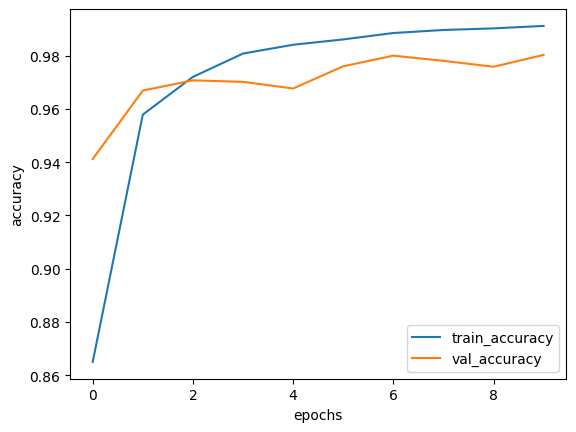

In [16]:
from matplotlib import pyplot as plt
plt.plot(accuracy_metrics.history['accuracy'],label='train_accuracy')
plt.plot(accuracy_metrics.history['val_accuracy'],label='val_accuracy')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.legend()

In [17]:
print(f"At the end of the {epochs}th epoch the validation accuracy has reached {'{:.4f}'.format(accuracy_metrics.history['val_accuracy'][-1])}")

At the end of the 10th epoch the validation accuracy has reached 0.9803


## plot loss curve

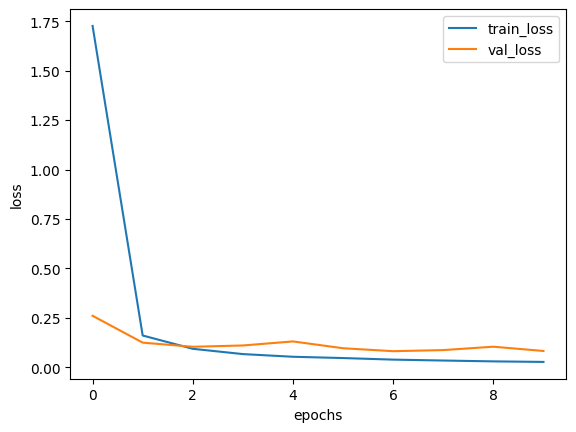

In [18]:
from matplotlib import pyplot as plt
plt.plot(accuracy_metrics.history['loss'],label='train_loss')
plt.plot(accuracy_metrics.history['val_loss'],label='val_loss')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend()

In [19]:
print(f"At the end of the {epochs}th epoch the validation loss has decreased to {'{:.4f}'.format(accuracy_metrics.history['val_loss'][-1])}")

At the end of the 10th epoch the validation loss has decreased to 0.0828


#### example plot of overfitting
![](https://i.stack.imgur.com/FkPkr.png)

Overfitting is best judged by looking at validation loss, rather than accuracy, for a series of reasons including the fact that accuracy is not always a good way to estimate the performance of classification models

In the above plot you can clearly observe that the validation loss significantly increases as you train for more epochs when compared to training loss

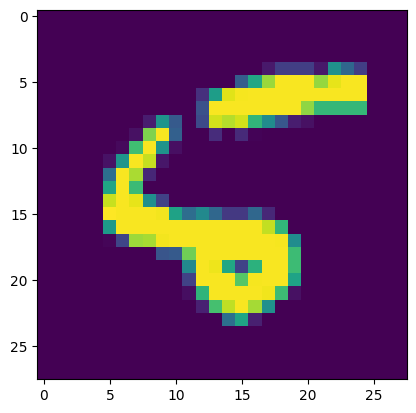

In [20]:
# visualization of one image from the test dataset
plt.imshow(xtest[8])

In [21]:
# original encoded label corresponding to the test data
ytest[8]

array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.], dtype=float32)

In [22]:
xtest.shape

(10000, 28, 28, 1)

In [23]:
# predict your test data
pred = model.predict(xtest)

313/313 [==============================] - 0s 1ms/step


In [24]:
pred

array([[5.5869127e-18, 8.8605085e-19, 3.4756926e-12, ..., 1.0000000e+00,
        4.0320507e-16, 1.4799127e-11],
       [8.5795611e-09, 9.5053287e-10, 1.0000000e+00, ..., 1.2863497e-14,
        9.8100070e-12, 1.1307605e-15],
       [7.4097437e-11, 9.9999774e-01, 3.1252199e-08, ..., 5.3356011e-08,
        3.1124318e-07, 1.7368559e-10],
       ...,
       [8.0517818e-19, 2.9374965e-09, 2.1166251e-18, ..., 2.5457735e-08,
        1.1873867e-11, 4.8859528e-12],
       [1.4493174e-13, 3.0195077e-17, 8.0833658e-17, ..., 3.1410527e-11,
        3.0861614e-08, 1.3667195e-09],
       [4.9860755e-06, 5.3717297e-10, 2.1604987e-11, ..., 1.1009240e-16,
        1.4689781e-06, 4.0684673e-14]], dtype=float32)

`pred` gives you the probability of all the 10 classes for each data in `xtest`

In [25]:
pred[8].argmax() 

5

Out of all the probabilities that the test data `xtest[8]` could be classified under, the 5th index has the highest probability


In [26]:
ytest_true[8] # the true label for test data

5

In [27]:
np.unique(ytrain)

array([0., 1.], dtype=float32)

## Confusion Matrix

<Figure size 800x800 with 0 Axes>

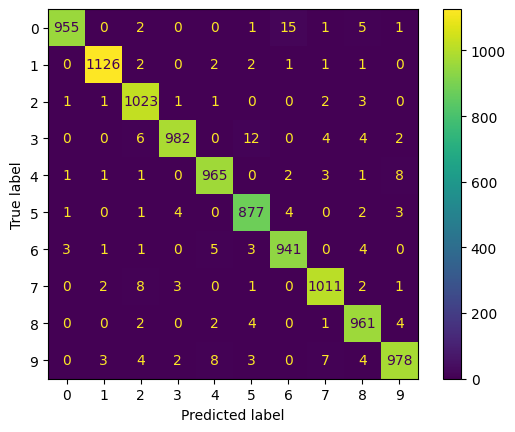

In [28]:
from sklearn.metrics import ConfusionMatrixDisplay
plt.figure(figsize = (8,8))
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_true=ytest_true, y_pred=np.argmax(pred, axis=-1))
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=np.unique(ytest_true))
disp.plot()
plt.show()

## Exercise
- Try out varying the different hyperparameters and run the model
- Try changing no. of filters, kernel_size, padding, activation, pool_size, units etc
- you can also add more Conv2D and Dense layers as well
- Try using different activation functions in the Conv2D layers
- While compiling the model try using different optimizers

### Bonus: take a look at the Feature Maps
#### This is to visualize the internal representation of our image as it passes through the 6 filters in our first Conv2D layer in the model

In [29]:
from tensorflow.keras.models import Model
from numpy import expand_dims

In [30]:
# All the layers present in the created model
model.layers

In [31]:
model.inputs

[<KerasTensor: shape=(None, 28, 28, 1) dtype=float32 (created by layer 'conv2d_input')>]

In [32]:
# redefine model to output right after the first hidden layer
K.clear_session()
model_small = Model(inputs=model.inputs, outputs=model.layers[0].output)
model_small.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_input (InputLayer)   [(None, 28, 28, 1)]       0         
                                                                 
 conv2d (Conv2D)             (None, 28, 28, 6)         60        
                                                                 
Total params: 60 (240.00 Byte)
Trainable params: 60 (240.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


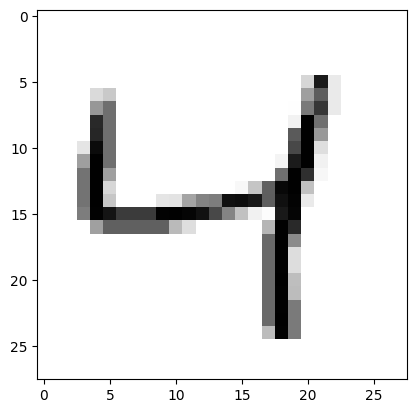

In [33]:
# load the image with the required shape
img = xtrain[2]
plt.imshow(img.reshape(28,28), cmap=plt.cm.Greys)

In [34]:
img.shape

(28, 28, 1)

In [35]:
# expand dimensions so that it represents a single 'sample' (number of images,width,height,number of channels)
img = expand_dims(img, axis=0)
#img = expand_dims(img, axis=3)
img.shape

(1, 28, 28, 1)

In [36]:
# get feature map for first hidden layer
feature_maps = model_small.predict(img)

1/1 [==============================] - 0s 130ms/step


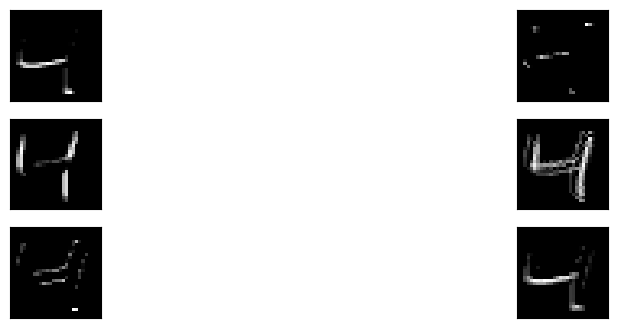

In [37]:
# plot all 6 maps in an 3*2 squares
height = 3
width = 2
ix = 1
plt.figure(figsize=(12,4))
for _ in range(height):
    for _ in range(width):
        # specify subplot and turn of axis
        ax = plt.subplot(height, width, ix)
        ax.set_xticks([])
        ax.set_yticks([])
        # plot filter channel in grayscale
        plt.imshow(feature_maps[0, :, :, ix-1], cmap='gray')
        ix += 1
# show the figure
plt.show()

## Appendix
If you observe overfitting while training your model try to use some regularization
- [BatchNormalization](https://keras.io/api/layers/normalization_layers/batch_normalization/)
    - Add batch normalization layer in between CNN layers
- [Dropout](https://keras.io/api/layers/regularization_layers/dropout/)
    - Add dropout layer in between dense layers
    

- Try using [callback functions](https://www.tensorflow.org/api_docs/python/tf/keras/callbacks), these are special utilities or functions that are executed during training at given stages of the training procedure.      
    - Callbacks can help you prevent overfitting, visualize training progress, debug your code, save checkpoints, generate logs, create a TensorBoard, etc.

    - eg. [EarlyStopping](https://www.tensorflow.org/api_docs/python/tf/keras/callbacks/EarlyStopping) which can be used to stop training when a monitored metric has stopped improving.
`EarlyStopping(monitor='val_loss', patience=5)`
 Remember to set the hyperparameter callbacks in the `model.fit(...,callbacks=[callback])`

- [Animations reference](https://medium.com/data-science/intuitively-understanding-convolutions-for-deep-learning-1f6f42faee1)
- [Calculate CNN parameters](https://stackoverflow.com/questions/42786717/how-to-calculate-the-number-of-parameters-for-convolutional-neural-network)
- [Overview of all optimizers](https://www.ruder.io/optimizing-gradient-descent/)